<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-02-11 17:25:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite'

     0K .......... .......... .......... .......... ..........  0% 21.6K 27m37s
    50K .......... .......... .......... .......... ..........  0% 28.9K 24m4s
   100K .......... .......... .......... .......... ..........  0%  114K 17m46s
   150K .......... .......... .......... .......... ..........  0%  136K 14m24s
   200K .......... .......... .......... .......... ..........  0%  182K 12m9s
  

 10300K .......... .......... .......... .......... .......... 28% 11.8M 24s
 10350K .......... .......... .......... .......... .......... 29% 4.33M 24s
 10400K .......... .......... .......... .......... .......... 29% 4.26M 24s
 10450K .......... .......... .......... .......... .......... 29% 3.58M 24s
 10500K .......... .......... .......... .......... .......... 29% 7.72M 23s
 10550K .......... .......... .......... .......... .......... 29% 14.0M 23s
 10600K .......... .......... .......... .......... .......... 29% 7.37M 23s
 10650K .......... .......... .......... .......... .......... 29% 1.93M 23s
 10700K .......... .......... .......... .......... .......... 30% 12.2M 23s
 10750K .......... .......... .......... .......... .......... 30% 5.33M 23s
 10800K .......... .......... .......... .......... .......... 30% 4.23M 23s
 10850K .......... .......... .......... .......... .......... 30% 28.0M 23s
 10900K .......... .......... .......... .......... .......... 30% 3.82M 22s

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

 12550K .......... .......... .......... .......... .......... 35%  118M 19s
 12600K .......... .......... .......... .......... .......... 35% 6.97M 19s
 12650K .......... .......... .......... .......... .......... 35% 7.25M 18s
 12700K .......... .......... .......... .......... .......... 35% 10.2M 18s
 12750K .......... .......... .......... .......... .......... 35% 14.8M 18s
 12800K .......... .......... .......... .......... .......... 35% 3.75M 18s
 12850K .......... .......... .......... .......... .......... 36% 5.74M 18s
 12900K .......... .......... .......... .......... .......... 36%  101K 19s
 12950K .......... .......... .......... .......... .......... 36% 6.18M 19s
 13000K .......... .......... .......... .......... .......... 36%  531K 19s
 13050K .......... .......... .......... .......... .......... 36% 2.12M 19s
 13100K .......... .......... .......... .......... .......... 36%  140M 19s
 13150K .......... .......... .......... .......... .......... 36% 1.81M 19s

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 23350K .......... .......... .......... .......... .......... 65% 2.11M 8s
 23400K .......... .......... .......... .......... .......... 65% 2.91M 8s
 23450K .......... .......... .......... .......... .......... 65% 2.27M 8s
 23500K .......... .......... .......... .......... .......... 65% 9.25M 8s
 23550K .......... .......... .......... .......... .......... 65% 1.75M 8s
 23600K .......... .......... .......... .......... .......... 66%  815K 8s
 23650K .......... .......... .......... .......... .......... 66% 3.81M 8s
 23700K .......... .......... .......... .......... .......... 66% 2.60M 8s
 23750K .......... .......... .......... .......... .......... 66% 1.82M 8s
 23800K .......... .......... .......... .......... .......... 66% 5.78M 7s
 23850K .......... .......... .......... .......... .......... 66% 6.81M 7s
 23900K .......... .......... .......... .......... .......... 66%  984K 7s
 23950K .......... .......... .......... .......... .......... 67% 16.3M 7s
 24000K ....

## Demo: How to run an sql query


In [9]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [10]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [19]:
QUERY = """
SELECT *
FROM Gender
"""
df = pd.read_sql_query(QUERY,conn)
# df
df.to_csv('Gender.csv', index=False)

In [7]:
df.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondents') # add to x-label to the plot
plt.ylabel('Language') # add y-label to the plot
plt.title('Number of Respondents by Language') # add title to the plot
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [11]:
QUERY = """
SELECT *
FROM DatabaseWorkedWith
where DatabaseWorkedWith = 'MySQL'
"""
Language = pd.read_sql_query(QUERY,conn)
Language.value_counts()

Respondent  DatabaseWorkedWith
4           MySQL                 1
16696       MySQL                 1
16735       MySQL                 1
16732       MySQL                 1
16719       MySQL                 1
                                 ..
8424        MySQL                 1
8422        MySQL                 1
8420        MySQL                 1
8416        MySQL                 1
25137       MySQL                 1
Length: 5469, dtype: int64

## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

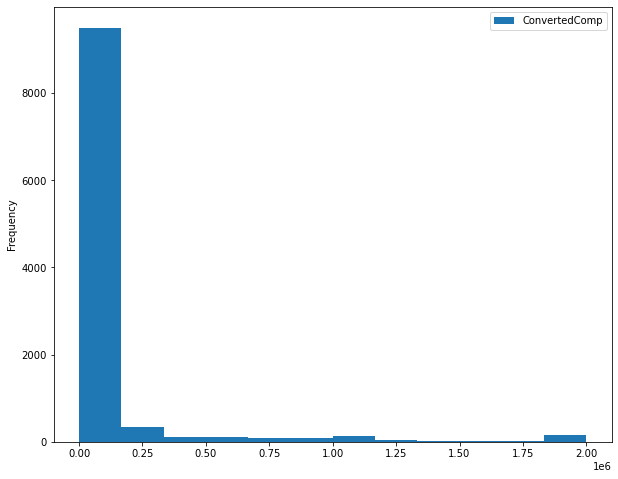

In [9]:
# your code goes here
QUERY1 = """
SELECT ConvertedComp
FROM master
"""
ConvertedComp = pd.read_sql_query(QUERY1,conn)
ConvertedComp.plot(kind='hist', figsize=(10, 8), bins=12)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

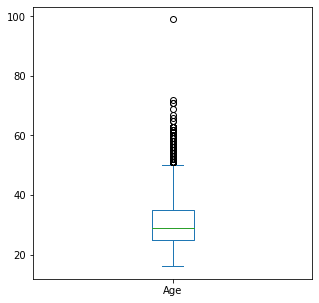

In [10]:
# your code goes here
QUERY2 = """
SELECT Age
FROM master
"""
Age = pd.read_sql_query(QUERY2,conn)
Age.plot(kind='box', figsize=(5, 5))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [11]:
# your code goes here
QUERY3 = """
SELECT Age
FROM master
"""
# Age = pd.read_sql_query(QUERY3,conn)

QUERY4 = """
SELECT WorkWeekHrs
FROM master
"""
# WorkWeekHrs = pd.read_sql_query(QUERY4,conn)

plt.scatter(x=Age, y=WorkWeekHrs)

NameError: name 'WorkWeekHrs' is not defined

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [ ]:
# your code goes here
QUERY5 = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY5,conn)
df.head()

ax = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 6), color='green')

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.xlim(0,200)
#plt.ylim(0,70)

#sns.regplot(x="WorkWeekHrs", y="CodeRevHrs", data=df)



# normalize Age data
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Age
ax = df.plot(kind='scatter', 
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="green",
                    s=norm_age * 1000 + 10,
                    ax = ax
                   )
ax.set_ylabel('Code Revision Hours')
ax.set_title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here
Query6="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Query6, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
# your code goes here



Close the database connection.


In [ ]:
# conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
